<a href="https://colab.research.google.com/github/AayushiShah03/Encryptix/blob/main/Task_2_Movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Moviess.csv to Moviess.csv


In [4]:
data = pd.read_csv('/content/Moviess.csv', encoding='latin-1')
data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

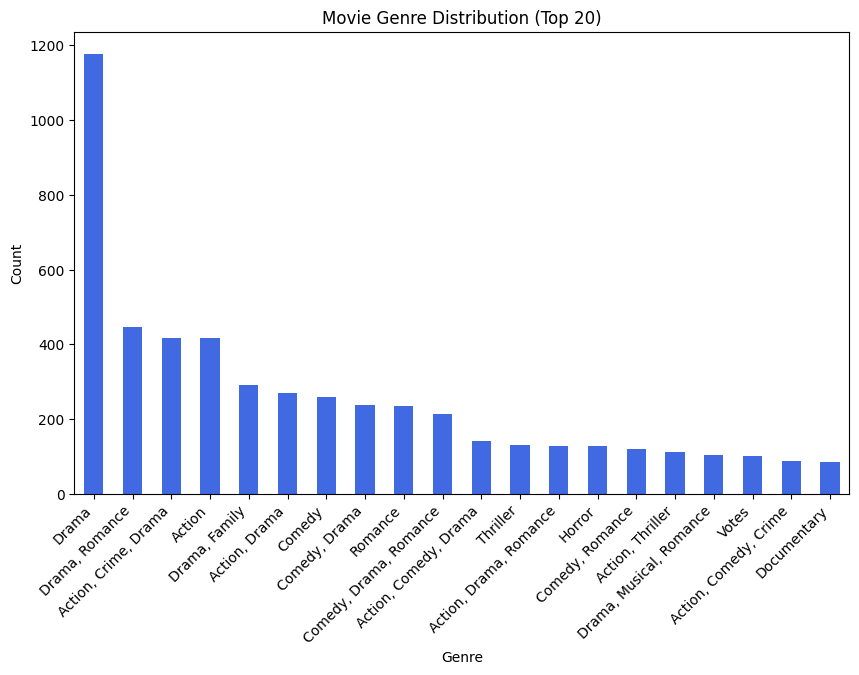

In [23]:
# Plotting top 20 movie genre
top_n = 20

genre_counts = data['Genre'].value_counts()
top_genres = genre_counts.nlargest(top_n)  # Get top N genres

plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='royalblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title(f'Movie Genre Distribution (Top {top_n})')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability (optional)
plt.show()

In [8]:
# Handling missing valued
data = data.dropna(subset=['Rating'])
data = data.fillna('Votes')

In [9]:
# Extract the year from 'Name' column using regular expression
data['1997'] = data['Name'].str.extract(r'\((\d{4})\)',expand = False)

# Converting the extracted year to numeric format....If there are any errors,coerce them to NaN
data['1997'] = pd.to_numeric(data['1997'], errors='coerce')

data.head(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,1997
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,NaN
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,NaN
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,NaN
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,NaN
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,NaN
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,NaN
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,NaN
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,NaN
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,NaN


In [11]:
X = data[['Genre','Director','Votes']]
y = data['Rating']

In [12]:
X

,Genre,Director,Votes
1,Drama,Gaurav Bakshi,8
3,"Comedy, Romance",Ovais Khan,35
5,"Comedy, Drama, Musical",Rahul Rawail,827
6,"Drama, Romance, War",Shoojit Sircar,"1,086"
8,"Horror, Mystery, Thriller",Allyson Patel,326
...,...,...,...
15501,"Action, Crime, Drama",Bharat Rangachary,135
15503,"Action, Crime, Drama",S.P. Muthuraman,44
15504,Action,Mahendra Shah,11
15505,"Action, Drama",Kuku Kohli,655


In [13]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15501    5.3
15503    5.8
15504    4.6
15505    4.5
15508    6.2
Name: Rating, Length: 7919, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Preprocessing the data (One-hot encoding for categorical features)
abc = ColumnTransformer(
    transformers=[('categorical,',OneHotEncoder(handle_unknown='ignore'),['Genre','Director','Votes'])]
    )
abc

ColumnTransformer(transformers=[('categorical,',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Genre', 'Director', 'Votes'])])

In [18]:
# Creating a pipeline with preprocessing & regression
xyz = Pipeline(steps=[('preprocessing',abc),('regression',LinearRegression())])
xyz

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical,',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Votes'])])),
                ('regression', LinearRegression())])

In [19]:
xyz.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical,',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Votes'])])),
                ('regression', LinearRegression())])

In [20]:
y_pred = xyz.predict(X_test)
y_pred

array([5.42574608, 6.90674081, 4.68723943, ..., 5.05616619, 5.75663565,
       6.02470383])

In [21]:
mse = mean_squared_error(y_test, y_pred)
mse

2.1907810276694057

In [22]:
r2 = r2_score(y_test, y_pred)
r2

-0.1783808481527447